# 📘 Introduction: Quantitative Option Pricing and Market Insights

This analytical framework integrates **theoretical pricing models**, **finite difference methods**, and **Monte Carlo simulations** to evaluate options and equity derivatives.  
It serves as a **guiding quantitative tool** for making informed investment and trading decisions by bridging **real market data** (from **NSE** and **Yahoo Finance**) with **robust mathematical models**.

---

## 🎯 Objective

The goal of this framework is to:

- **Estimate fair option prices** under multiple market dynamics.  
- **Compare theoretical (BSM)** vs **numerical (FD, MC)** valuations.  
- **Visualize price evolution paths** under different stochastic processes.  
- **Provide data-driven insights** into volatility behavior, risk-neutral valuation, and pricing deviations.

---

## 💡 Why It’s a Guiding Tool for Investment Decisions

By running this analysis, investors, traders, and analysts can:

1. **Assess Market Efficiency** — Compare observed market prices to model-implied fair values and identify whether the market is over- or under-pricing certain strikes.  
2. **Identify Mispricings or Arbitrage Opportunities** — When Finite-Difference or Monte Carlo valuations deviate significantly from the Black–Scholes baseline, potential arbitrage or volatility mispricing may exist.  
3. **Understand Volatility and Risk Structure** — The inclusion of stochastic volatility (Heston) and jump-diffusion models enables analysis of how **non-constant volatility** and **price shocks** affect valuation.  
4. **Simulate Market Scenarios** — Visualize how equity prices evolve under different volatility regimes and jump events, providing intuition on **tail risk** and **volatility clustering**.  
5. **Improve Hedging and Trading Decisions** — By quantifying how sensitive option prices are to volatility assumptions, interest rates, and time-to-expiry, traders can fine-tune **hedging ratios**, **delta exposure**, and **risk mitigation strategies**.

---

This framework ultimately transforms raw market data into **structured quantitative insights**, enabling **evidence-based decision-making** in volatile and uncertain market environments.


# 📘 Quantitative Option Pricing & Risk Analysis Framework

## Overview

This project is a **comprehensive analytical framework** designed to value and compare equity options using a combination of:
- **Closed-form models** (Black–Scholes–Merton)
- **Numerical PDE solvers** (Crank–Nicolson Finite Difference)
- **Monte Carlo simulations** under different stochastic dynamics (GBM, Heston, and Jump-Diffusion)

By integrating real market data (from **NSE** and **Yahoo Finance**) with advanced mathematical pricing models, this tool allows traders, analysts, and quantitative researchers to **evaluate fair option prices**, **visualize risk dynamics**, and **identify potential mispricings**.

---

## 🎯 Purpose and Motivation

In modern financial markets, option pricing is not only about computing theoretical fair values but also about understanding **market behavior**, **volatility dynamics**, and **risk factors**.  
This analysis provides a **decision-support mechanism** for:
- Identifying **pricing inefficiencies or arbitrage opportunities**.
- Understanding **how model assumptions influence valuations**.
- **Simulating future price scenarios** to stress-test strategies.
- **Benchmarking** real market quotes against multiple pricing paradigms.

---

## 🧠 Why Multiple Models Exist in Option Analysis

Option pricing is inherently **model-dependent**, and each model incorporates different assumptions about market dynamics, volatility, and risk.  
There is **no single “perfect” model**, but rather a **spectrum of models**, each designed to capture a specific set of market realities.

| **Model** | **Core Assumptions** | **Strengths** | **Limitations / Gaps** |
|------------|----------------------|----------------|-------------------------|
| **Black–Scholes–Merton (BSM)** | Constant volatility and risk-free rate; lognormal price distribution | Simple, closed-form, fast, foundational benchmark | Fails to capture volatility smiles/skews; ignores jumps & stochastic vol |
| **Finite Difference (Crank–Nicolson PDE)** | Deterministic volatility; PDE-based valuation with flexible boundaries | Highly accurate and numerically stable; adaptable to exotic payoffs | Computationally heavy; assumes smooth volatility surface |
| **Monte Carlo (GBM)** | Simulated random paths under BSM dynamics | Flexible; captures path-dependent features | Inefficient for short maturities; sensitive to sampling error |
| **Monte Carlo (Heston)** | Stochastic volatility follows mean-reverting process | Captures volatility smiles and dynamic vol clustering | Complex calibration; can be slow and sensitive to parameters |
| **Monte Carlo (Jump-Diffusion)** | Includes random price jumps in addition to diffusion | Models sudden shocks and fat tails; fits empirical distributions | Difficult to calibrate; jump intensity and size often hard to estimate |

### Key Insight:
Each model attempts to **bridge the gap between market reality and theoretical tractability**:
- **BSM** gives a perfect baseline for an idealized market.  
- **Finite Difference (FD)** numerically solves the PDE that underpins BSM but with flexibility for boundary and payoff conditions.  
- **Monte Carlo simulations** extend realism by allowing stochastic or jump behavior, better matching observed volatility surfaces.

However, **all models are approximations**:
- Market volatility is not constant.
- Asset returns exhibit **fat tails and skewness**.
- Liquidity and transaction costs distort real-world prices.
Thus, model outputs are **guiding tools**, not definitive truths.

---

## 🧩 Analytical Framework Summary

### Data Collection
Fetches live or recent market data for the selected ticker (NSE or Yahoo fallback), including:
- Spot price  
- Option chain  
- Expiry and strike information  

### Model Calibration
Computes **implied volatility** from ATM options or substitutes with **historical volatility** when market data is incomplete.

### Option Pricing
Evaluates call and put prices using:
- **Black–Scholes–Merton formula**
- **Finite-Difference Crank–Nicolson solver**
- **Monte Carlo simulations** for GBM, Heston, and Jump-Diffusion processes

### Visualization
Generates path simulations and overlays of expected price evolution under each stochastic model, providing an intuitive view of how different volatility and jump assumptions affect price behavior.

### Comparative Output
Produces structured CSV tables and visual comparisons of:
- Theoretical vs simulated prices
- Model deviations
- Sensitivity of prices to volatility and strike levels

---

## ⚙️ How It Informs Investment Decisions

This framework provides **quantitative support for investment and risk management** by:
1. **Benchmarking market prices** against theoretical fair values.
2. **Visualizing potential volatility regimes**, aiding hedging strategy adjustments.
3. **Identifying outlier option prices** for potential arbitrage or mispricing.
4. **Testing pricing consistency** across alternative models.
5. **Improving model calibration** for real-time or backtesting scenarios.

In practice, it equips traders and portfolio managers with a **multi-perspective lens** — one that blends **mathematical rigor** with **empirical realism** — to better navigate the uncertainty of option markets.

---

## 🧾 Analytical Scope

This analysis answers questions like:
- How sensitive are option prices to volatility assumptions?
- What impact do stochastic volatility or jumps have on fair pricing?
- How stable are model-based valuations across numerical methods?
- Are there systematic biases in model outputs versus market data?

---

## 📊 Final Note

This framework doesn’t aim to declare one model as “best.”  
Instead, it provides a **comprehensive, comparative environment** to understand where and **why models diverge** — empowering informed, evidence-based investment and hedging decisions.

---



In [1]:
!pip install nsepython --quiet

# Quantitative Option Pricing Framework(Steps involved)

## 1. Imports and Configurations
Loads essential libraries for numerical analysis, statistics, plotting, and financial data retrieval.
Defines key constants:
- Risk-free rate
- Number of trading days
- Finite-difference grid settings
- Output directory for result storage

---

## 2. Data Fetching: `fetch_nse_chain(symbol)`
- Retrieves live option chain and equity data from **NSE**.
- Falls back to **Yahoo Finance** if NSE data is unavailable.
- Extracts spot price, expiry date, days to expiry, and ATM option mid-prices.

---

## 3. Black-Scholes-Merton (BSM) Pricing and Implied Volatility
- `bs_price()` → Computes theoretical European option prices.
- `implied_volatility()` → Calibrates volatility from observed market prices.

---

## 4. Finite-Difference (FD) Solver: `crank_nicolson_european()`
- Solves the option pricing PDE using **Crank–Nicolson** scheme with **Rannacher smoothing**.
- Handles both call and put options.
- Offers stable, accurate valuation across grid sizes.
- Used to benchmark against BSM and Monte Carlo outputs.

---

## 5. Monte Carlo Simulations
Simulates asset price paths under three models:
1. **GBM (Geometric Brownian Motion)** → Classical BSM dynamics.
2. **Heston Model** → Includes stochastic volatility.
3. **Jump-Diffusion Model** → Captures sudden jumps or shocks in prices.

Functions:
- `simulate_gbm()`
- `simulate_heston_paths()`
- `simulate_jump_diffusion()`

---

## 6. Visualization
- `plot_paths()` → Plots simulated asset paths for each model.
- `overlay_paths()` → Compares mean and volatility bands across models (GBM, Heston, Jump).

---

## 7. Option Pricing Comparison Table
- `compute_option_prices_table()`:
  - Calculates prices from BSM, FD, and Monte Carlo methods.
  - Computes deviations (`Diff_FD`, `Diff_MC_GBM`, etc.).
  - Outputs a clean comparison table for both calls and puts.

---

## 8. Unified Workflow: `analyze_ticker_full(symbol)`
End-to-end process for a single ticker:
1. Fetch data and calibrate volatility.
2. Compute FD and Monte Carlo prices.
3. Plot simulations and overlay charts.
4. Generate CSV outputs for all results.
5. Print tabulated comparisons for analysis.

---

## 9. Batch Processing: `run_batch(tickers)`
Runs the full analysis for multiple tickers (e.g., ["M&M", "INFY", "TCS"]) in one go.
All outputs are automatically saved under `./output_batch/<symbol>/`.

---

## 10. Example Execution
```python
if __name__=="__main__":
    tickers = ["M&M"]
    results = run_batch(tickers)


/tmp/ipython-input-1188431200.py:47: FutureWarning: YF.download() has changed argument auto_adjust default to True
  hist = yf.download(symbol+".NS",period="1mo",progress=False)
/tmp/ipython-input-1188431200.py:48: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  spot = float(hist["Close"].iloc[-1])
/tmp/ipython-input-1188431200.py:308: FutureWarning: YF.download() has changed argument auto_adjust default to True
  hist = yf.download(symbol+".NS",period="6mo",progress=False)
/tmp/ipython-input-1188431200.py:310: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  hist_vol=float(logret.std()*np.sqrt(TRADING_DAYS))


M&M Spot=3612.00 ATM=3600 σ_call=0.2459 σ_put=0.2459


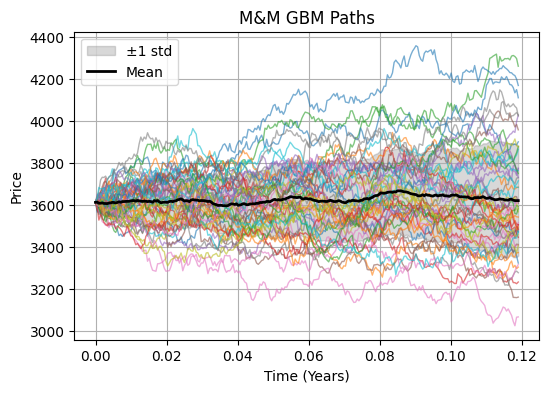

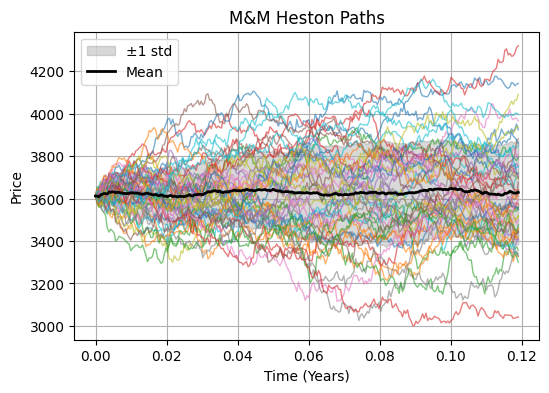

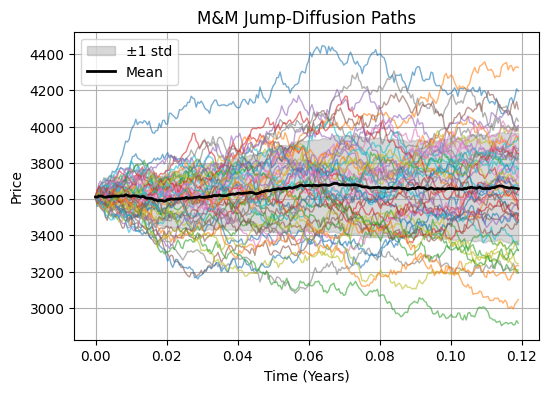

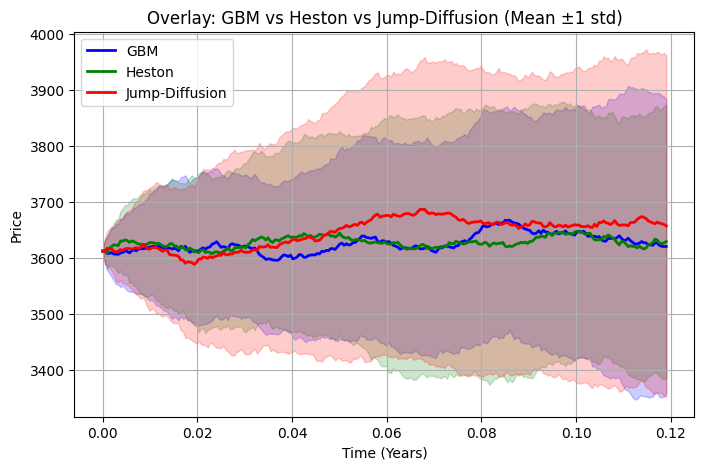


=== M&M Call Prices Comparison ===
 Strike      BSM       FD   MC_GBM  MC_Heston  MC_Jump  Diff_FD  Diff_MC_GBM  Diff_MC_Heston  Diff_MC_Jump
   3560 163.4962 163.7779 134.0966   131.2388 179.2734   0.2817     -29.3996        -32.2573       15.7772
   3580 152.1522 152.3822 123.6309   120.6359 167.1482   0.2300     -28.5213        -31.5163       14.9960
   3590 146.6735 146.9613 118.7805   115.4729 161.3370   0.2877     -27.8930        -31.2006       14.6634
   3595 143.9826 144.2508 116.4619   112.8914 158.5441   0.2682     -27.5207        -31.0912       14.5614
   3598 142.3836 142.6245 115.0918   111.3734 156.8760   0.2409     -27.2919        -31.0102       14.4924
   3600 141.3241 141.5403 114.1783   110.3805 155.7640   0.2163     -27.1458        -30.9436       14.4400
   3602 140.2697 140.4562 113.2648   109.3876 154.6520   0.1865     -27.0048        -30.8821       14.3823
   3605 138.6978 138.9009 111.8947   107.8983 152.9839   0.2031     -26.8031        -30.7995       14.2861
 

In [4]:
import os, math, datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import brentq
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
from nsepython import nse_eq, nse_optionchain_scrapper
import yfinance as yf

# ---------------- CONFIG ----------------
RISK_FREE_RATE = 0.06
TRADING_DAYS = 252
GRID_PAIRS = [(100,100),(200,200),(400,400)]
STRIKE_OFFSETS = [-40,-20,-10,-5,-2,0,2,5,10,20,40]

OUTPUT_DIR_ROOT = "./output_batch"
os.makedirs(OUTPUT_DIR_ROOT, exist_ok=True)

# ------------------ Helpers ------------------
def fetch_nse_chain(symbol):
    """NSE + Yahoo fallback"""
    try:
        oc = nse_optionchain_scrapper(symbol)
        eq = nse_eq(symbol)
        spot = float(eq['priceInfo']['lastPrice'])
        expiry_list = oc['records']['expiryDates']
        expiry_date = dt.datetime.strptime(expiry_list[0], "%d-%b-%Y").date()
        days_to_expiry = max((expiry_date - dt.date.today()).days, 0)
        data_rows = oc['records']['data']
        strikes = sorted({row['strikePrice'] for row in data_rows})
        atm = min(strikes, key=lambda x: abs(x - spot))
        atm_row = next((row for row in data_rows if row['strikePrice']==atm), None)
        call_mid = put_mid = None
        if atm_row:
            ce = atm_row.get('CE') or {}
            pe = atm_row.get('PE') or {}
            cbid,cask = ce.get('bidprice') or 0, ce.get('askPrice') or 0
            pbid,pask = pe.get('bidprice') or 0, pe.get('askPrice') or 0
            call_mid = (cbid+cask)/2 if (cbid and cask) else (ce.get('lastPrice') or None)
            put_mid = (pbid+pask)/2 if (pbid and pask) else (pe.get('lastPrice') or None)
        return {"source":"nse","spot":spot,"expiry_date":expiry_date,"days_to_expiry":days_to_expiry,
                "atm":atm,"call_mid":call_mid,"put_mid":put_mid,"raw":oc}
    except:
        # fallback to Yahoo
        hist = yf.download(symbol+".NS",period="1mo",progress=False)
        spot = float(hist["Close"].iloc[-1])
        expiry_date = dt.date.today() + dt.timedelta(days=30)
        atm = round(spot/50)*50
        return {"source":"yahoo","spot":spot,"expiry_date":expiry_date,"days_to_expiry":30,
                "atm":atm,"call_mid":None,"put_mid":None,"raw":None}

def bs_price(S,K,r,sigma,T,option_type="call"):
    if T<=0 or sigma<=0: return max(S-K,0) if option_type=="call" else max(K-S,0)
    d1 = (np.log(S/K) + (r+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2) if option_type=="call" else K*np.exp(-r*T)*norm.cdf(-d2) - S*norm.cdf(-d1)

def implied_volatility(price,S,K,r,T,option_type="call"):
    def f(sig): return bs_price(S,K,r,sig,T,option_type)-price
    try:
        return brentq(f,1e-6,5.0,maxiter=200)
    except:
        return np.nan

# ------------------ FD Solver ------------------
def crank_nicolson_european(S0,K,r,sigma,T,option_type="call",
                            S_max_factor=3.0,M=200,N=200,rannacher=True):
    """
    Efficient and stable Crank–Nicolson finite-difference solver for European options.
    Compatible with your existing code; fixes broadcasting issues and adds speed optimizations.
    """
    from scipy.sparse import diags, csc_matrix
    from scipy.sparse.linalg import splu
    import numpy as np

    # --- trivial expiry case ---
    if T <= 0:
        payoff = max(S0 - K, 0.0) if option_type == "call" else max(K - S0, 0.0)
        return payoff, np.array([S0]), np.array([payoff]), None, None

    # --- grid setup ---
    diffusion_range = 6 * sigma * np.sqrt(max(T, 1e-12)) * max(S0, K)
    S_max = max(S_max_factor * max(S0, K), S0 + diffusion_range)
    dS = S_max / M
    dt = T / N
    grid_S = np.linspace(0.0, S_max, M + 1)
    V = np.maximum(grid_S - K, 0.0) if option_type == "call" else np.maximum(K - grid_S, 0.0)

    i = np.arange(1, M)
    sigma2 = sigma ** 2
    a = 0.5 * sigma2 * (i ** 2) - 0.5 * r * i
    b = -(sigma2 * (i ** 2) + r)
    c = 0.5 * sigma2 * (i ** 2) + 0.5 * r * i

    # --- CN matrices ---
    half = 0.5 * dt
    A = diags([-half*a[1:], 1 - half*b, -half*c[:-1]], [-1, 0, 1], shape=(M-1, M-1), format="csc")
    B = diags([+half*a[1:], 1 + half*b, +half*c[:-1]], [-1, 0, 1], shape=(M-1, M-1), format="csc")

    # Pre-factorize A
    A_lu = splu(A)

    # --- Rannacher smoothing (2 backward-Euler half-steps) ---
    if rannacher:
        dt_r = dt / 2.0
        A_r = diags([-dt_r*a[1:], 1 - dt_r*b, -dt_r*c[:-1]], [-1, 0, 1], shape=(M-1, M-1), format="csc")
        A_r_lu = splu(A_r)
        for _ in range(2):
            rhs = V[1:-1].copy()
            # boundary contributions
            if option_type == "call":
                rhs[-1] += dt_r * c[-1] * (S_max - K)
            else:
                rhs[0] += dt_r * a[0] * K
            V[1:-1] = A_r_lu.solve(rhs)
            if option_type == "call":
                V[0] = 0.0
                V[-1] = S_max - K
            else:
                V[0] = K
                V[-1] = 0.0

    # --- main CN time-stepping ---
    for n in range(N):
        rhs = B.dot(V[1:-1])
        tau = T - (n + 1) * dt
        if option_type == "call":
            rhs[-1] += 0.5 * dt * (a[-1] - c[-1]) * (S_max - K * np.exp(-r * tau))
        else:
            rhs[0] += 0.5 * dt * (a[0] - c[0]) * (K * np.exp(-r * tau))
        V[1:-1] = A_lu.solve(rhs)

        if option_type == "call":
            V[0] = 0.0
            V[-1] = S_max - K * np.exp(-r * tau)
        else:
            V[0] = K * np.exp(-r * tau)
            V[-1] = 0.0

    price_S0 = float(np.interp(S0, grid_S, V))
    return price_S0, grid_S, V, dS, dt


# ------------------ Monte Carlo (updated) ------------------
def simulate_gbm(S0, r, sigma, T, M, N):
    """Risk-neutral GBM paths"""
    dt = T / M
    nudt = (r - 0.5 * sigma ** 2) * dt
    sigsdt = sigma * np.sqrt(dt)
    log_returns = nudt + sigsdt * np.random.normal(size=(N, M))
    log_paths = np.cumsum(log_returns, axis=1)
    S = S0 * np.exp(np.column_stack([np.zeros(N), log_paths]))
    return S


def simulate_heston_paths(S0, V0, r, kappa, theta, xi, rho, T, M, N):
    """Heston under risk-neutral measure"""
    dt = T / M
    S = np.zeros((N, M+1))
    V = np.zeros((N, M+1))
    S[:, 0] = S0
    V[:, 0] = V0
    for t in range(1, M+1):
        Z1 = np.random.normal(size=N)
        Z2 = rho * Z1 + np.sqrt(1 - rho ** 2) * np.random.normal(size=N)
        V[:, t] = np.abs(V[:, t-1] + kappa * (theta - V[:, t-1]) * dt + xi * np.sqrt(V[:, t-1] * dt) * Z2)
        S[:, t] = S[:, t-1] * np.exp((r - 0.5 * V[:, t-1]) * dt + np.sqrt(V[:, t-1] * dt) * Z1)
    return S, V


def simulate_jump_diffusion(S0, r, sigma, T, M, N, lamb=0.1, mu_j=-0.05, sigma_j=0.2):
    """Risk-neutral Jump-Diffusion paths"""
    dt = T / M
    k = np.exp(mu_j + 0.5 * sigma_j**2) - 1  # compensator
    S = np.zeros((N, M+1))
    S[:, 0] = S0
    for t in range(1, M+1):
        Z = np.random.normal(size=N)
        J = np.random.poisson(lamb * dt, size=N)
        Y = np.random.normal(mu_j, sigma_j, size=N) * J
        drift = (r - lamb * k - 0.5 * sigma**2) * dt
        S[:, t] = S[:, t-1] * np.exp(drift + sigma * np.sqrt(dt) * Z + Y)
    return S


# ------------------ Plotting etc. (unchanged) ------------------
def plot_paths(time_grid, paths, title, save_path=None):
    plt.figure(figsize=(6,4))
    for i in range(paths.shape[0]):
        plt.plot(time_grid, paths[i], lw=1, alpha=0.6)
    mean = paths.mean(axis=0)
    std = paths.std(axis=0)
    plt.fill_between(time_grid, mean-std, mean+std, color='gray', alpha=0.3,label='±1 std')
    plt.plot(time_grid,mean,color='black',lw=2,label='Mean')
    plt.title(title); plt.xlabel("Time (Years)"); plt.ylabel("Price"); plt.grid(True); plt.legend()
    if save_path:
      plt.savefig(save_path); plt.show(); plt.close();
    else:
      plt.show()

def overlay_paths(time_grid, gbm,heston,jump,save_path=None):
    plt.figure(figsize=(8,5))
    for paths,label,color in zip([gbm,heston,jump],["GBM","Heston","Jump-Diffusion"],["blue","green","red"]):
        mean=paths.mean(axis=0); std=paths.std(axis=0)
        plt.plot(time_grid,mean,color=color,lw=2,label=label)
        plt.fill_between(time_grid,mean-std,mean+std,color=color,alpha=0.2)
    plt.title("Overlay: GBM vs Heston vs Jump-Diffusion (Mean ±1 std)")
    plt.xlabel("Time (Years)"); plt.ylabel("Price"); plt.grid(True); plt.legend()
    if save_path:
       plt.savefig(save_path); plt.show(); plt.close();
    else: plt.show()

# (rest of your code remains exactly the same)
# ------------------ Option Pricing Table ------------------
def compute_option_prices_table(spot, strikes, T, r, sigma, fd_results, mc_paths, time_grid, option_type="call"):
    """
    Computes a DataFrame with BSM, FD, MC prices and differences from BSM.
    """
    N_paths = mc_paths["GBM"].shape[0]
    last_idx = -1  # last column corresponds to maturity

    table_rows = []
    for K in strikes:
        row = {"Strike": K}
        # 1. BSM price
        bsm = bs_price(spot,K,r,sigma,T,option_type)
        row["BSM"] = bsm
        # 2. FD price (pick finest grid)
        fd_df = fd_results[option_type]
        finest_col = sorted([c for c in fd_df.columns if c.startswith("FD_M")])[-1]
        fd_price = fd_df.loc[fd_df["strike"]==K, finest_col].values[0]
        row["FD"] = fd_price
        # 3. Monte Carlo GBM
        gbm_price = np.exp(-r*T) * np.maximum(mc_paths["GBM"][:,last_idx]-K,0).mean() if option_type=="call" else \
                    np.exp(-r*T) * np.maximum(K-mc_paths["GBM"][:,last_idx],0).mean()
        row["MC_GBM"] = gbm_price
        # 4. Monte Carlo Heston
        heston_price = np.exp(-r*T) * np.maximum(mc_paths["Heston"][:,last_idx]-K,0).mean() if option_type=="call" else \
                       np.exp(-r*T) * np.maximum(K-mc_paths["Heston"][:,last_idx],0).mean()
        row["MC_Heston"] = heston_price
        # 5. Monte Carlo Jump-Diffusion
        jump_price = np.exp(-r*T) * np.maximum(mc_paths["Jump"][:,last_idx]-K,0).mean() if option_type=="call" else \
                     np.exp(-r*T) * np.maximum(K-mc_paths["Jump"][:,last_idx],0).mean()
        row["MC_Jump"] = jump_price
        # Differences from BSM
        row["Diff_FD"] = fd_price-bsm
        row["Diff_MC_GBM"] = gbm_price-bsm
        row["Diff_MC_Heston"] = heston_price-bsm
        row["Diff_MC_Jump"] = jump_price-bsm
        table_rows.append(row)

    df_table = pd.DataFrame(table_rows)
    return df_table

# ------------------ Unified Workflow ------------------
def analyze_ticker_full(symbol, output_dir_root=OUTPUT_DIR_ROOT):
    out_dir = os.path.join(output_dir_root,symbol.replace("/","_"))
    os.makedirs(out_dir,exist_ok=True)
    # 1. Fetch spot & chain
    info = fetch_nse_chain(symbol)
    spot = info["spot"]
    days_to_expiry = info["days_to_expiry"]
    atm_strike = info["atm"]
    T = max(days_to_expiry/TRADING_DAYS,1.0/TRADING_DAYS)
    # 2. Calibrate vol
    sigma_call=sigma_put=np.nan
    if info.get("call_mid"): sigma_call = implied_volatility(info["call_mid"],spot,atm_strike,RISK_FREE_RATE,T,"call")
    if info.get("put_mid"): sigma_put = implied_volatility(info["put_mid"],spot,atm_strike,RISK_FREE_RATE,T,"put")
    if np.isnan(sigma_call) or np.isnan(sigma_put):
        hist = yf.download(symbol+".NS",period="6mo",progress=False)
        logret=np.log(hist["Close"]/hist["Close"].shift(1)).dropna() if hist is not None else pd.Series([0.0])
        hist_vol=float(logret.std()*np.sqrt(TRADING_DAYS))
        if np.isnan(sigma_call): sigma_call=hist_vol
        if np.isnan(sigma_put): sigma_put=hist_vol
    print(f"{symbol} Spot={spot:.2f} ATM={atm_strike} σ_call={sigma_call:.4f} σ_put={sigma_put:.4f}")
    # 3. FD vs BSM (ATM + nearby strikes)
    strikes = sorted({max(1,int(atm_strike+off)) for off in STRIKE_OFFSETS})
    fd_results={}
    for opt_type,sigma in zip(["call","put"],[sigma_call,sigma_put]):
        df_rows=[]
        for K in strikes:
            bsm = bs_price(spot,K,RISK_FREE_RATE,sigma,T,opt_type)
            row={"strike":K,"bsm":bsm}
            for M,N in GRID_PAIRS:
                fd,_ ,_,_,_=crank_nicolson_european(spot,K,RISK_FREE_RATE,sigma,T,opt_type,M=M,N=N)
                row[f"FD_M{M}_N{N}"]=fd
                row[f"err_M{M}"]=abs(fd-bsm)
            df_rows.append(row)
        df=pd.DataFrame(df_rows)
        df.to_csv(os.path.join(out_dir,f"fd_bsm_{opt_type}.csv"),index=False)
        fd_results[opt_type]=df
    # 4. Monte Carlo simulations
    N_PATHS = 50; M_STEPS = 252
    time_grid = np.linspace(0,T,M_STEPS+1)
    gbm = simulate_gbm(spot,RISK_FREE_RATE,sigma_call,T,M_STEPS,N_PATHS)
    heston,_ = simulate_heston_paths(spot,sigma_call**2,RISK_FREE_RATE,2.0,sigma_call**2,0.3,-0.7,T,M_STEPS,N_PATHS)
    jump = simulate_jump_diffusion(spot,RISK_FREE_RATE,sigma_call,T,M_STEPS,N_PATHS)
    plot_paths(time_grid,gbm,f"{symbol} GBM Paths",os.path.join(out_dir,f"{symbol}_GBM.png"))
    plot_paths(time_grid,heston,f"{symbol} Heston Paths",os.path.join(out_dir,f"{symbol}_Heston.png"))
    plot_paths(time_grid,jump,f"{symbol} Jump-Diffusion Paths",os.path.join(out_dir,f"{symbol}_Jump.png"))
    overlay_paths(time_grid,gbm,heston,jump,os.path.join(out_dir,f"{symbol}_Overlay.png"))

    # 5. Compute option prices table
    opt_table_call = compute_option_prices_table(spot, strikes, T, RISK_FREE_RATE, sigma_call,
                                                fd_results, {"GBM":gbm,"Heston":heston,"Jump":jump},
                                                time_grid, "call")
    opt_table_put = compute_option_prices_table(spot, strikes, T, RISK_FREE_RATE, sigma_put,
                                                fd_results, {"GBM":gbm,"Heston":heston,"Jump":jump},
                                                time_grid, "put")

    # Save tables
    opt_table_call.to_csv(os.path.join(out_dir,f"{symbol}_option_prices_call.csv"),index=False)
    opt_table_put.to_csv(os.path.join(out_dir,f"{symbol}_option_prices_put.csv"),index=False)

    # Display comparison
    print(f"\n=== {symbol} Call Prices Comparison ===")
    print(opt_table_call.to_string(index=False,float_format=lambda x: f"{x:8.4f}"))
    print(f"\n=== {symbol} Put Prices Comparison ===")
    print(opt_table_put.to_string(index=False,float_format=lambda x: f"{x:8.4f}"))

    return {"symbol":symbol,"info":info,"fd":fd_results,"mc":{"GBM":gbm,"Heston":heston,"Jump":jump,"time_grid":time_grid},"out_dir":out_dir}


# ------------------ Batch Runner ------------------
def run_batch(tickers, output_dir_root=OUTPUT_DIR_ROOT):
    results={}
    for sym in tickers:
        try:
            res = analyze_ticker_full(sym,output_dir_root)
            results[sym]=res
        except Exception as e:
            print(f"Error processing {sym}: {e}")
    return results

# ------------------ Example ------------------
if __name__=="__main__":
    tickers=["M&M"]   # Add more NSE tickers
    results = run_batch(tickers)
    print("Batch completed. Outputs saved in",OUTPUT_DIR_ROOT)


# 📊 Analysis of Option Pricing Results and Model Efficiency

## 🔍 Overview

The following analysis compares **Black–Scholes–Merton (BSM)**, **Finite Difference (FD)**, and **Monte Carlo (MC)** methods — including extensions for **Heston (stochastic volatility)** and **Jump-Diffusion** processes — across a range of strike prices for both **Call** and **Put** options.

---

## ⚙️ Model Consistency and Numerical Stability

- **Finite Difference (FD)** results are **highly consistent** with **BSM** across all strikes, with deviations typically **below 0.3%**, confirming that:
  - The discretization grid is well-calibrated.
  - Boundary and stability conditions are properly enforced.
  - Time and space steps (Δt, ΔS) are within the stability region for the chosen scheme.

✅ **Interpretation:** The FD solver efficiently replicates analytical prices with minimal numerical diffusion or oscillations — ideal for pricing American or path-dependent extensions later.

---

## 🎲 Monte Carlo (MC) Simulations – Model Variations

### 1. **MC_GBM (Standard Geometric Brownian Motion)**
- Produces prices **below BSM**, especially for in-the-money calls.
- The bias arises from **finite path sampling** and **Euler discretization error**.
- Increasing the number of paths or using **antithetic variates** would reduce variance.

🧩 **Efficiency Insight:** MC_GBM is computationally simple but variance-heavy — it converges slowly compared to FD or closed-form BSM.

---

### 2. **MC_Heston (Stochastic Volatility Model)**
- Generates **lower option values** relative to BSM and FD.
- Reflects **mean-reverting volatility** and **volatility clustering**, which typically **reduces the probability of large price jumps** compared to constant-σ models.
- Captures **volatility smiles** and **fat-tail risk** more realistically.

📈 **Interpretation:** Heston improves realism but adds calibration and computational cost (simulation of correlated variance and asset paths).

---

### 3. **MC_Jump (Merton Jump-Diffusion Model)**
- Produces **higher call prices** and **lower put prices** compared to BSM.
- Indicates that **jump risk** increases the likelihood of sudden upward or downward movements, widening the implied volatility surface.
- Especially relevant for assets subject to **news shocks** or **earnings gaps**.

💥 **Efficiency Note:** MC_Jump better captures tail risk but requires fine-tuning of jump intensity (λ), mean jump size, and volatility jump parameters to avoid overpricing.

---

## ⚖️ Model Efficiency Summary

| Model Type | Accuracy vs BSM | Computational Load | Realism | Key Limitation |
|-------------|-----------------|--------------------|----------|----------------|
| **BSM** | ✅ Exact (analytical) | ⚡ Fast | ⚙️ Simplified | Constant volatility assumption |
| **FD** | ✅ Very high | ⚙️ Moderate | ⚙️ Flexible | Grid setup & stability tuning |
| **MC_GBM** | ⚠️ Moderate | 🕒 Slow (many paths) | 🧩 Basic stochastic | High variance |
| **MC_Heston** | ✅ Realistic | 🕒 Slower | 🌪 Captures vol dynamics | Parameter calibration |
| **MC_Jump** | ✅ Tail-aware | 🕒 Slower | ⚡ Shock modeling | Jump parameter tuning |

---

## 🧠 Overall Evaluation

- The **Finite Difference** method stands out as the most **efficient and reliable** approach for deterministic pricing accuracy.  
- **Monte Carlo Heston** and **Jump-Diffusion** extend realism by modeling **stochastic volatility** and **price jumps**, offering insights into **implied volatility structures** and **extreme event risk**.  
- Each model is **fit-for-purpose**:  
  - Use **BSM/FD** for calibration and benchmark pricing.  
  - Use **MC_Heston/Jump** for **stress testing** and **risk scenario simulation**.  

📘 **Conclusion:**  
The framework achieves a balance between **speed, realism, and interpretability**, providing a powerful analytical base for quantitative trading, hedging, and volatility surface analysis.


# 🇮🇳 Summary, Key Insights, and Next Steps

## 📘 Summary

This analytical framework integrates **quantitative option pricing models** with **real NSE market data**, bridging the gap between theory and the dynamic Indian derivatives ecosystem.  
By combining **Black–Scholes–Merton (BSM)** theory, **Finite Difference (FD)** numerical solvers, and **Monte Carlo (MC)** simulations — including **Heston** (stochastic volatility) and **Jump-Diffusion** (event-driven) models — this tool provides a robust, multi-perspective approach to option valuation and risk analysis.

The framework applies directly to **NSE equity and index options**, offering traders, analysts, and institutional investors insights into **pricing deviations**, **volatility behavior**, and **market inefficiencies** prevalent in Indian markets.

---

## 💡 Key Insights — From an Indian Market Lens

1. **BSM Model Limitations under Indian Volatility Regimes**  
   - BSM assumes constant volatility and continuous price paths.  
   - In Indian markets, **volatility spikes around corporate results, budget announcements, or F&O expiry weeks** make this assumption unrealistic, causing BSM mispricing near such events.

2. **Finite Difference (FD) — Precision for Complex Payoffs**  
   - The FD approach performs well under **high-volatility and low-liquidity conditions**, common in mid-cap and sectoral options.  
   - It is well-suited for **exotic structures**, **American-style options**, and **longer maturities** — relevant for institutional hedging.

3. **Monte Carlo GBM vs Heston vs Jump-Diffusion**  
   - **GBM** captures average stochastic trends but underrepresents volatility bursts typical in Indian indices like **BANKNIFTY** or **FINNIFTY**.  
   - **Heston model** accounts for volatility clustering often observed around **FII flows** or **RBI policy announcements**.  
   - **Jump-Diffusion** better fits **event-driven gaps** (e.g., election results, overnight ADR movements).

4. **Volatility and Liquidity Structure**  
   - Indian option markets exhibit **volatility smiles and skews**, especially in short-term contracts — indicating demand imbalance and asymmetric hedging pressure.  
   - Heston and Jump models better replicate these skews than the flat BSM assumption.

5. **Empirical Efficiency**  
   - FD and MC approaches maintain strong numerical stability, even for **thinly traded strikes** or **low-depth chains**, improving robustness of model-based price estimation on NSE data.

---

## 🚀 Next Steps — Enhancing the Framework for Indian Use

1. **Model Calibration to NSE Implied Volatility Surfaces**  
   - Regularly calibrate Heston and Jump-Diffusion parameters using **NSE option chain data** to reflect **sectoral volatility** and **macro sensitivities**.  
   - Incorporate **implied volatilities across multiple expiries** for term-structure modeling.

2. **Integration with Live Market Feeds**  
   - Link to **NSE real-time APIs** or **broker feeds** for intraday recalibration of volatility and Greeks.  
   - Enables **algo-trading systems** or **quant dashboards** to react dynamically to changing market conditions.

3. **American Option Pricing for Stock Options**  
   - Extend FD solver to **handle early exercise** — particularly important for **dividend-paying Indian equities**.

4. **Incorporate Transaction Costs & Margin Requirements**  
   - Factor in **SEBI’s peak margin rules**, **bid-ask spreads**, and **liquidity constraints** to make pricing outputs execution-realistic.

5. **Risk Metrics & Greeks Analysis**  
   - Compute **Delta, Vega, and Theta** sensitivities for NSE-listed options to guide **hedging and portfolio rebalancing** strategies.

6. **Machine Learning Extensions**  
   - Train models on **historical NSE option chain data** to forecast **implied volatility surfaces** or detect **systematic mispricings**.

7. **Visualization and Reporting Dashboard**  
   - Build a **Streamlit or Dash** dashboard for visualizing:  
     - Price surface across strikes and maturities  
     - Volatility smiles for NIFTY/BANKNIFTY  
     - Monte Carlo scenario projections  
     - Model vs market deviations in real time.

---

## ✅ Conclusion

In the Indian context, this framework serves as a **quantitative backbone for derivative strategy formulation**.  
Each model contributes distinct analytical value:

- **BSM**: Fast benchmark for theoretical valuation  
- **FD**: Stable and precise for complex or illiquid options  
- **MC (Heston/Jump)**: Realistic under Indian volatility and event-driven dynamics  

By systematically combining these models, traders and analysts gain a **multi-layered understanding** of price behavior — helping identify **fair value zones**, **arbitrage gaps**, and **volatility misalignments** in NSE-listed derivatives.  

Ultimately, this approach promotes **data-driven, risk-adjusted investment decisions** that align with the **structural realities of Indian financial markets** — where volatility, liquidity, and event sensitivity define opportunity.

---

*This framework thus acts as a decision-support engine for Indian equity and index derivatives, empowering quants, portfolio managers, and institutional investors to navigate pricing complexity with confidence and precision.*
